In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import re
import zapimoveis_scraper

%matplotlib inline

In [77]:
## Dados
zap_imoveis = zapimoveis_scraper.search(localization="go+goiania++setor-oeste", num_pages=8)
new_list_zap = {}

prices = []
areas = []
for zap_imovel in zap_imoveis:
    prices.append(int(re.sub('[^0-9]', '', zap_imovel.price)))
    areas.append(int(str(zap_imovel.total_area_m2).replace('m2', '')))

new_list_zap['preco'] = prices
new_list_zap['tamanho'] = areas
apes = pd.DataFrame(new_list_zap)

X_original = np.array(apes.tamanho)
y_original = np.array(apes.preco)

In [78]:
## Normalizando os dados
### Função para pegar o maior e o menor
def pegar_min_max(linha):
    maior = max(linha)
    menor = min(linha)
    
    return menor, maior

def normalizar(menor, maior, dados):
    dados_normalizados = []
    for dado in dados:
        dados_normalizados.append((dado - menor) / (maior - menor))
    return dados_normalizados

In [79]:
minX, maxX = pegar_min_max(X_original)
minY, maxY = pegar_min_max(y_original)

X = normalizar(minX, maxX, X_original)
y = normalizar(minY, maxY, y_original)

In [80]:
X

[0.1411042944785276,
 0.19141104294478528,
 0.2883435582822086,
 1.0,
 0.32515337423312884,
 0.17791411042944785,
 0.2085889570552147,
 0.1901840490797546,
 0.0,
 0.2147239263803681,
 0.30920245398773005,
 0.1656441717791411,
 0.1411042944785276,
 0.19141104294478528,
 0.2883435582822086,
 1.0,
 0.32515337423312884,
 0.17791411042944785,
 0.2085889570552147,
 0.1901840490797546,
 0.0,
 0.2147239263803681,
 0.30920245398773005,
 0.1656441717791411,
 0.1411042944785276,
 0.19141104294478528,
 0.2883435582822086,
 1.0,
 0.32515337423312884,
 0.17791411042944785,
 0.2085889570552147,
 0.1901840490797546,
 0.0,
 0.2147239263803681,
 0.30920245398773005,
 0.1656441717791411,
 0.1411042944785276,
 0.19141104294478528,
 0.2883435582822086,
 1.0,
 0.32515337423312884,
 0.17791411042944785,
 0.2085889570552147,
 0.1901840490797546,
 0.0,
 0.2147239263803681,
 0.30920245398773005,
 0.1656441717791411,
 0.1411042944785276,
 0.19141104294478528,
 0.2883435582822086,
 1.0,
 0.32515337423312884,
 0.1

In [81]:
y

[0.06903765690376569,
 0.13702928870292888,
 0.20502092050209206,
 1.0,
 0.5292887029288703,
 0.04811715481171548,
 0.3200836820083682,
 0.12133891213389121,
 0.0,
 0.3723849372384937,
 0.3723849372384937,
 0.100418410041841,
 0.06903765690376569,
 0.13702928870292888,
 0.20502092050209206,
 1.0,
 0.5292887029288703,
 0.04811715481171548,
 0.3200836820083682,
 0.12133891213389121,
 0.0,
 0.3723849372384937,
 0.3723849372384937,
 0.100418410041841,
 0.06903765690376569,
 0.13702928870292888,
 0.20502092050209206,
 1.0,
 0.5292887029288703,
 0.04811715481171548,
 0.3200836820083682,
 0.12133891213389121,
 0.0,
 0.3723849372384937,
 0.3723849372384937,
 0.100418410041841,
 0.06903765690376569,
 0.13702928870292888,
 0.20502092050209206,
 1.0,
 0.5292887029288703,
 0.04811715481171548,
 0.3200836820083682,
 0.12133891213389121,
 0.0,
 0.3723849372384937,
 0.3723849372384937,
 0.100418410041841,
 0.06903765690376569,
 0.13702928870292888,
 0.20502092050209206,
 1.0,
 0.5292887029288703,
 0.

In [82]:
## TAXA DE APRENDIZADO ( velocidade de descida )
alpha = 0.01

In [83]:
## VALORES INICIAIS PARA W0 e W1
w0 = 0.1
w1 = 0.1

In [84]:
## Definindo hipótese
def hip(x, w0, w1):
    return w0 + w1*x

In [85]:
## Realizando uma predição com o custo alto
hip(1.5, w0, w1)

0.25

In [86]:
## Função para plotar pontos e regressão
def plot_line(X, y, w0, w1):
    x_values = [i for i in range(int(min(X))-1, int(max(X))+2)]
    y_values = [hip(x, w0, w1) for x in x_values]
    plt.xlabel("Tamanho(m2)")
    plt.ylabel("Preço")
    plt.plot(x_values, y_values, 'r')
    plt.plot(X, y, 'bo')

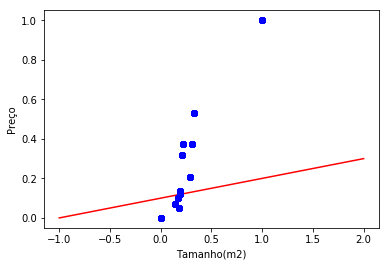

In [87]:
plot_line(X, y, w0, w1)

In [88]:
## Função MSE(Média do erro ao quadrado)
def MSE(X, y, w0, w1):
    custo = 0
    m = float(len(X))

    for i in range(0, len(X)):
        custo += (hip(X[i], w0, w1) - y[i]) ** 2

    return custo / m

In [89]:
MSE(X, y, w0, w1)

0.08180486969831623

In [90]:
epoch = 4000

In [91]:
## Gradiente Descendente
### STEP
def gradient_descent_step(w0, w1, X, y, alpha):
    erro_w0 = 0
    erro_w1 = 0
    m = float(len(X))

    for i in range(0, len(X)):
        erro_w0 += hip(float(X[i]), w0, w1) - float(y[i])
        erro_w1 += (hip(float(X[i]), w0, w1) - float(y[i])) * X[i]

    novo_w0 = w0 - alpha * (1 / m) * erro_w0
    novo_w1 = w1 - alpha * (1 / m) * erro_w1
    
    return novo_w0, novo_w1

In [92]:
### LOOP
def gradient_descent(w0, w1, X, y, alpha, epoch):
    custo = np.zeros(epoch)

    for i in range(epoch):
        w0, w1 = gradient_descent_step(w0, w1, X, y, alpha)
        custo[i] = MSE(X, y, w0, w1)

    return w0, w1, custo

In [93]:
w0 , w1 , custo = gradient_descent(w0, w1, X, y, alpha, epoch)

In [94]:
custo

array([0.08121147, 0.08062979, 0.0800596 , ..., 0.0108909 , 0.01089014,
       0.01088937])

In [95]:
print("w0={}, w1={}".format(w0,w1))

w0=0.023917207855088957, w1=0.9364963482999935


Text(0.5, 1.0, 'MSE vs. Epoch')

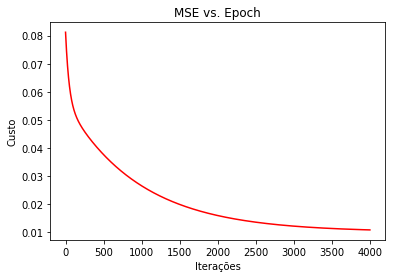

In [96]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), custo, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('MSE vs. Epoch')

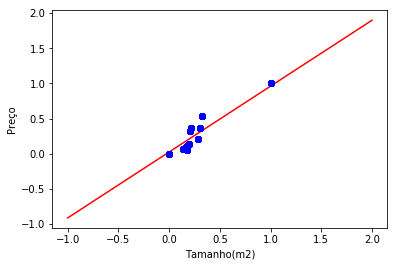

In [97]:
plot_line(X,y, w0, w1)

In [98]:
## Realizando uma previsão
hip(500, w0, w1)

468.2720913578519